<a href="https://colab.research.google.com/github/mirrorball108/EEG-analysis-of-Autism-patients/blob/main/autism_day7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_pre=pd.read_csv('/content/pre_treatement_combined.csv')
df_pre.head()

,FP2-F4,F4 -C4,C4 -P4,P4 -O2,FP1-F3,F3 -C3,C3 -P3,P3 -O1,FP2-F8,F8 -T4,T4 -T6,T6 -O2,FP1-F7,F7 -T3,T3 -T5,T5 -O1
0,-65,3,-16,20,5,-4,-65,84,26,-71,-7,-8,76,-40,-44,28
1,-108,41,-17,16,-28,183,-85,79,22,-86,5,-10,201,-12,-42,2
2,-177,102,-20,12,-84,481,-113,69,16,-111,25,-14,402,30,-41,-38
3,-270,177,-23,6,-157,849,-145,55,2,-144,51,-19,647,81,-40,-87
4,-383,260,-26,-1,-242,1250,-178,37,-21,-184,80,-26,911,137,-42,-140


In [ ]:
df_post=pd.read_csv('/content/post_treatment_combined.csv')
df_post=df_post.drop([0,1])
df_post.head()

,FP2-F4,F4 -C4,C4 -P4,P4 -O2,FP1-F3,F3 -C3,C3 -P3,P3 -O1,FP2-F8,F8 -T4,T4 -T6,T6 -O2,FP1-F7,F7 -T3,T3 -T5,T5 -O1
2,-74.0,4.0,-16.0,-53.0,1.0,-15.0,-22.0,-32.0,-24.0,-47.0,-56.0,-13.0,-8.0,-43.0,7.0,-24.0
3,-92.0,0.0,-14.0,-31.0,-28.0,-5.0,-20.0,-26.0,-47.0,-42.0,-57.0,9.0,-28.0,-46.0,12.0,-17.0
4,-126.0,-3.0,-12.0,-12.0,-61.0,5.0,-17.0,-21.0,-89.0,-32.0,-57.0,24.0,-52.0,-48.0,18.0,-12.0
5,-163.0,-5.0,-10.0,-5.0,-85.0,10.0,-13.0,-18.0,-136.0,-19.0,-55.0,28.0,-72.0,-47.0,22.0,-9.0
6,-188.0,-6.0,-9.0,-8.0,-91.0,10.0,-10.0,-18.0,-171.0,-8.0,-53.0,20.0,-82.0,-45.0,23.0,-7.0


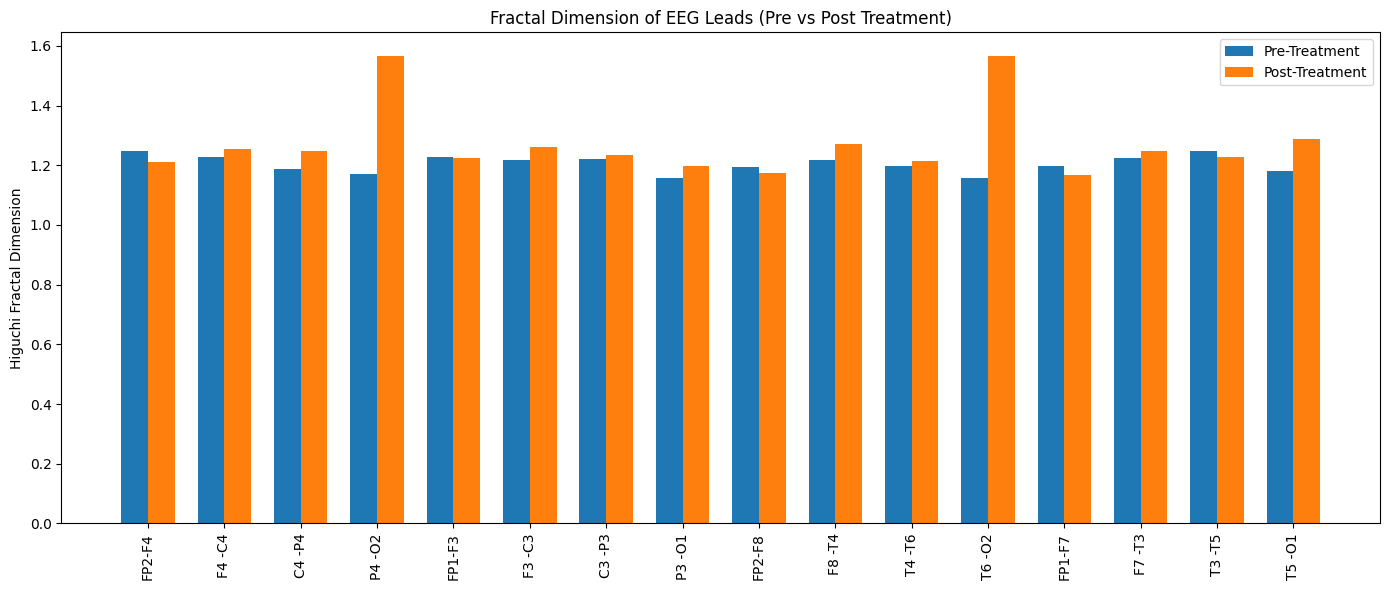

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Custom Higuchi Fractal Dimension function
def higuchi_fd(x, k_max=10):
    L = []
    x = np.array(x)
    N = len(x)

    for k in range(1, k_max + 1):
        Lk = []
        for m in range(k):
            Lmk = 0
            n_max = int(np.floor((N - m - 1) / k))
            for i in range(1, n_max):
                Lmk += abs(x[m + i * k] - x[m + (i - 1) * k])
            Lmk = (Lmk * (N - 1)) / (k * n_max * k)
            Lk.append(Lmk)
        L.append(np.mean(Lk))

    lnL = np.log(L)
    lnk = np.log(1.0 / np.arange(1, k_max + 1))
    coeffs = np.polyfit(lnk, lnL, 1)
    return coeffs[0]

# Compute HFD for each lead
pre_fd = {}
post_fd = {}

for lead in df_pre.columns:
    pre_fd[lead] = higuchi_fd(df_pre[lead].values)
    post_fd[lead] = higuchi_fd(df_post[lead].values)

# Convert to DataFrame for easy plotting
fd_df = pd.DataFrame({
    'Lead': list(pre_fd.keys()),
    'Pre-Treatment FD': list(pre_fd.values()),
    'Post-Treatment FD': [post_fd[lead] for lead in pre_fd.keys()]
})

# Plot comparison
plt.figure(figsize=(14, 6))
x = np.arange(len(fd_df))
width = 0.35

plt.bar(x - width/2, fd_df['Pre-Treatment FD'], width, label='Pre-Treatment')
plt.bar(x + width/2, fd_df['Post-Treatment FD'], width, label='Post-Treatment')
plt.xticks(x, fd_df['Lead'], rotation=90)
plt.ylabel("Higuchi Fractal Dimension")
plt.title("Fractal Dimension of EEG Leads (Pre vs Post Treatment)")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=9a1a983e1baa0134f5a5ab7cb9a332833c05a0adbf3e59ce11a9d55c647be904
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport

# Create the profile report
profile = ProfileReport(df_pre, title='Pandas Profiling Report for pre treatment', explorative=True)

# Save to an HTML file
profile.to_file("EDA_Report_for_pre_treatment.html")


NameError: name 'df_pre' is not defined

In [ ]:
# Create the profile report
profile = ProfileReport(df_post, title='Pandas Profiling Report for post treatment', explorative=True)

# Save to an HTML file
profile.to_file("EDA_Report_for_post_treatment.html")
